### Importando os modulos que serão utilizados para facilitar a análise dos dados

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl

from pathlib import Path
from re import compile as cp
from calendar import month_abbr
from os import mkdir, path


### Cria a pasta Médias e a pasta Figuras para poderem ser salvos os resultados obtidos

In [3]:
if not path.exists('dados/radar/medias'):
    mkdir('dados/radar/medias')
    mkdir('dados/radar/figuras')

### Cria uma lista de todos os arquivos dentro da pasta passada dentro do Path('.')(Para mudar de pasta, só mudar o '.', pelo nome da pasta. Ex: Path('casa'))

In [4]:
caminho = Path('dados/radar/VentoSJC')
arquivos = sorted([i for i in caminho.glob('*.txt')])


### Procura pelo ano e mês dentro do nome do arquivo. Util para saber qual mês está sendo trabalhado e de qual ano

In [5]:
compilado = cp('[a-z]|[A-Z]')
ano = cp('\d\d\d\d')

In [6]:
dict_month_number = {
    'Jan': '01',
    'Feb': '02',
    'Mar': '03',
    'Apr': '04',
    'May': '05',
    'Jun': '06',
    'Jul': '07',
    'Aug': '08',
    'Sep': '09',
    'Oct': '10',
    'Nov': '11',
    'Dec': '12'
}

# Ler os dados, calcula a média e salva na pasta médias

In [7]:
ucolunas = range(0, 8)

cabe = ['tempo', '81', '84', '87', '90', '93', '96', '99']


for i in arquivos:
    df = pd.read_csv(i, sep='\s+',skiprows=[0], usecols=ucolunas, names=cabe)
    nome = ''.join(compilado.findall(str(i)))
    anos = ''.join(ano.findall(str(i)))
    mes = month_abbr[int(anos[4:6])]
    inicio = 0
    fim = 24
    medias = []

    # while inicio <= len(df):
    #     laco = df[inicio:fim].mean()
    #     medias.append(laco)
    #     inicio = fim
    #     fim+=24

    first_day_month = df[inicio:fim]
    first_day_month['tempo'] = [n for n in range(0, 24)]

    if 'Meridional' in str(i):
        nome_arquivo_final = "dados_meridional"
    else:
        nome_arquivo_final = "dados_zonal"

    first_day_month.to_string(f'dados/radar/medicoes_dias/{nome_arquivo_final}_{anos[:4]}{dict_month_number[mes]}.txt', index=False)

    # medias = pd.DataFrame(medias)
    # medias.to_string(f'dados/radar/medicoes_dias/{nome_arquivo_final}_{anos[:4]}_{mes}.txt')

C:\Users\kdemo\AppData\Local\Temp\ipykernel_34220\22160110.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_day_month['tempo'] = [n for n in range(0, 24)]
C:\Users\kdemo\AppData\Local\Temp\ipykernel_34220\22160110.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_day_month['tempo'] = [n for n in range(0, 24)]
C:\Users\kdemo\AppData\Local\Temp\ipykernel_34220\22160110.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

## Defini o estilo para a plotagem dos gráficos

In [8]:
mpl.style.use('ggplot')
# mpl.rcParams['font.family'] = ['Family1', 'Serif', 'cursive']
mpl.rcParams['font.size'] = 30
mpl.rcParams['figure.max_open_warning'] = 50

## Cria uma lista com todos os dados salvos dentro da pasta médias

In [9]:
caminho_medias = 'dados/radar/medicoes_dias'
c_medias = Path(caminho_medias)
arquivos3 = sorted([i for i in c_medias.glob('*.txt')])

In [10]:
[arq for arq in arquivos3 if "zonal" in str(arq) and "2005" in str(arq)]

[WindowsPath('dados/radar/medicoes_dias/dados_zonal_200501.txt'),
 WindowsPath('dados/radar/medicoes_dias/dados_zonal_200502.txt'),
 WindowsPath('dados/radar/medicoes_dias/dados_zonal_200503.txt'),
 WindowsPath('dados/radar/medicoes_dias/dados_zonal_200504.txt'),
 WindowsPath('dados/radar/medicoes_dias/dados_zonal_200505.txt'),
 WindowsPath('dados/radar/medicoes_dias/dados_zonal_200506.txt'),
 WindowsPath('dados/radar/medicoes_dias/dados_zonal_200507.txt'),
 WindowsPath('dados/radar/medicoes_dias/dados_zonal_200508.txt'),
 WindowsPath('dados/radar/medicoes_dias/dados_zonal_200509.txt'),
 WindowsPath('dados/radar/medicoes_dias/dados_zonal_200510.txt'),
 WindowsPath('dados/radar/medicoes_dias/dados_zonal_200511.txt'),
 WindowsPath('dados/radar/medicoes_dias/dados_zonal_200512.txt')]

In [11]:
dados_zonal_2005 = [arq for arq in arquivos3 if "zonal" in str(arq) and "2005" in str(arq)]
dados_zonal_2006 = [arq for arq in arquivos3 if "zonal" in str(arq) and "2006" in str(arq)]
dados_meridional_2005 = [arq for arq in arquivos3 if "meridional" in str(arq) and "2005" in str(arq)]
dados_meridional_2006 = [arq for arq in arquivos3 if "meridional" in str(arq) and "2006" in str(arq)]

In [12]:
dict_meses = {
    '01': '01.01',
    '02': '01.02',
    '03': '01.03',
    '04': '01.04',
    '05': '01.05',
    '06': '01.06',
    '07': '01.07',
    '08': '01.08',
    '09': '01.09',
    '10': '01.10',
    '11': '01.11',
    '12': '01.12',
}

## Plota os dados e salva as figuras dentro da pasta figuras

In [13]:
def plot_figures(titulo, dados, dict_meses, cabe):
    fig, ax = plt.subplots(6, 2, figsize=(32,48), constrained_layout=True)
    cols = [j for i in range(0, 6) for j in range(0,2)]
    lines = [i for i in range(0, 6) for j in range(0,2)]

    fig.suptitle(titulo, fontsize=40)
    fig.supxlabel('Tempo', fontsize=40)
    fig.supylabel('Altitudes', fontsize=40)

    for path,i,j in zip(dados, lines, cols):
        df3 = pd.read_csv(path, sep='\s+')
        
        nome_arquivo = str(path)
        
        ano = nome_arquivo[-10:-6]
        mes = nome_arquivo[-6:-4]

        x = df3['tempo'].T
        y = [float(i) for i in cabe[1:]]
        z = df3[cabe[1:]].T
        z_a = np.array(z) 

        X,Y = np.meshgrid(x,y)
        
        cs = ax[i][j].contourf(X, Y, z_a,levels=50, cmap='jet_r')

        min = cs.cvalues.min()
        max = cs.cvalues.max()

        norm = plt.Normalize(vmin=min, vmax=max)
        sm = plt.cm.ScalarMappable(norm=norm, cmap = cs.cmap)

        ax[i][j].set_title(f'{dict_meses[mes]}.{ano}')
        ax[i][j].title.set_size(30)
        
        fig.colorbar(sm, ax=ax[i][j])

    plt.savefig(f'dados/radar/figuras/{titulo}.png')
    plt.show()

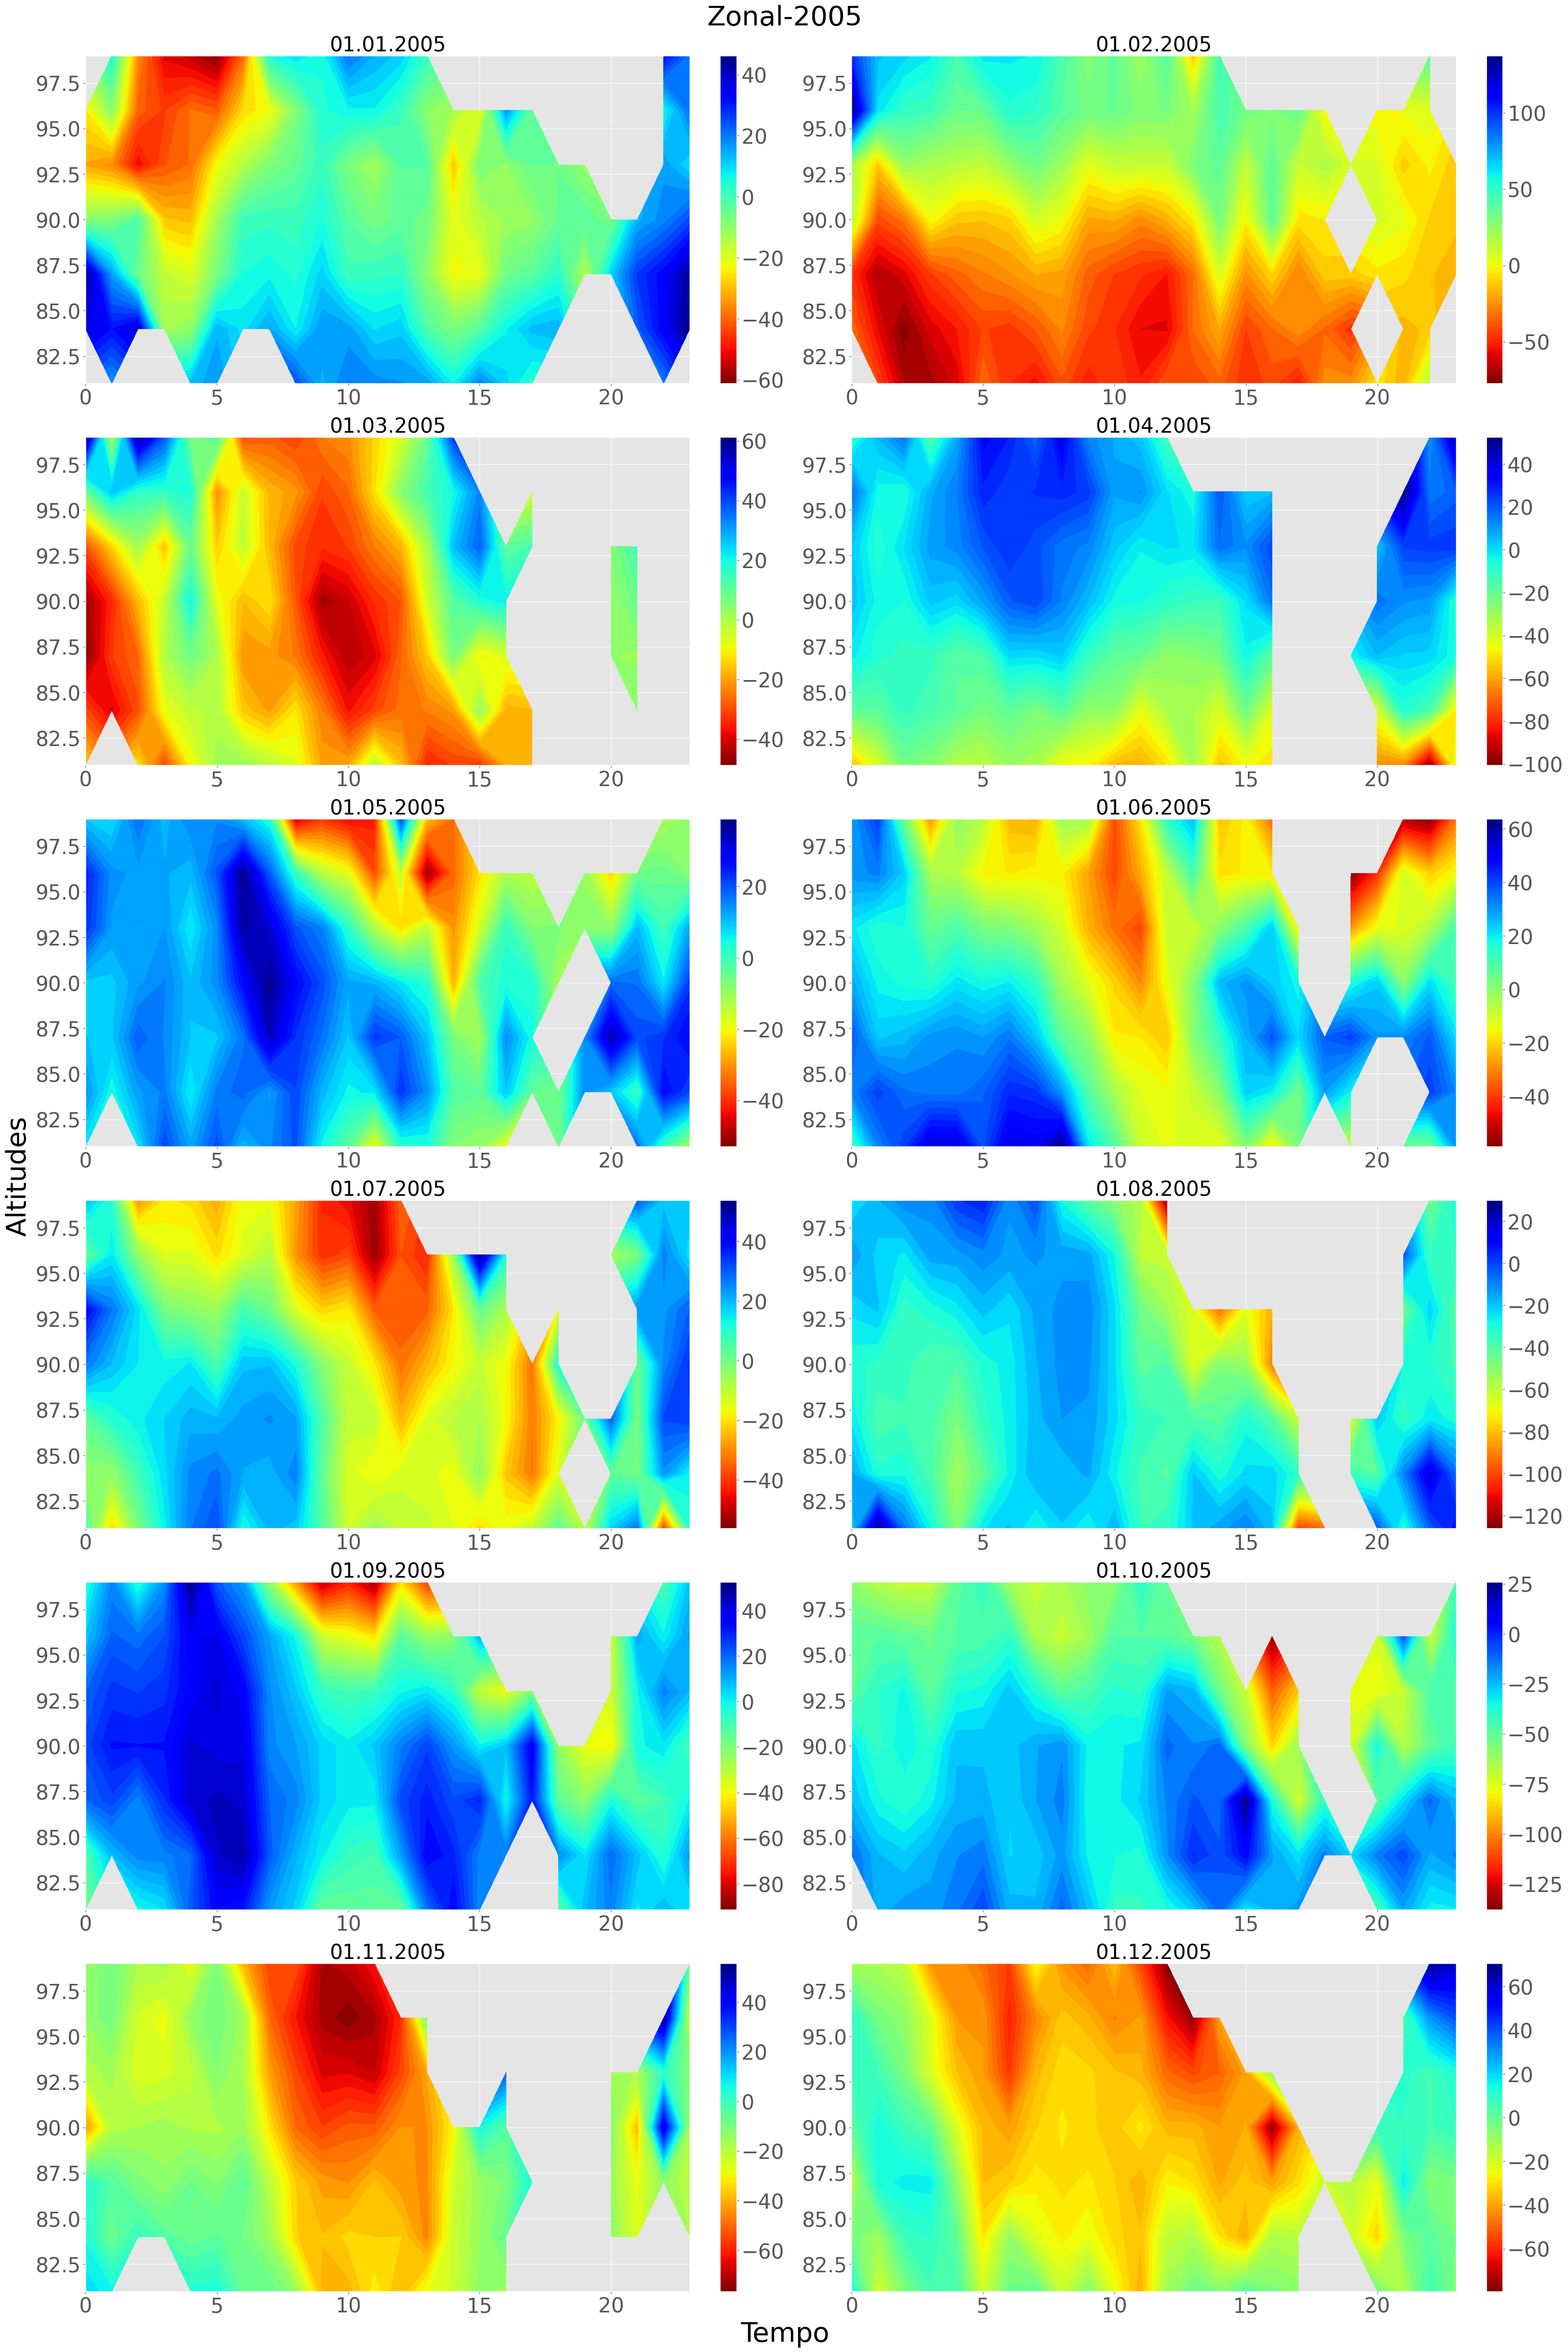

In [14]:
plot_figures("Zonal-2005", dados_zonal_2005, dict_meses, cabe)

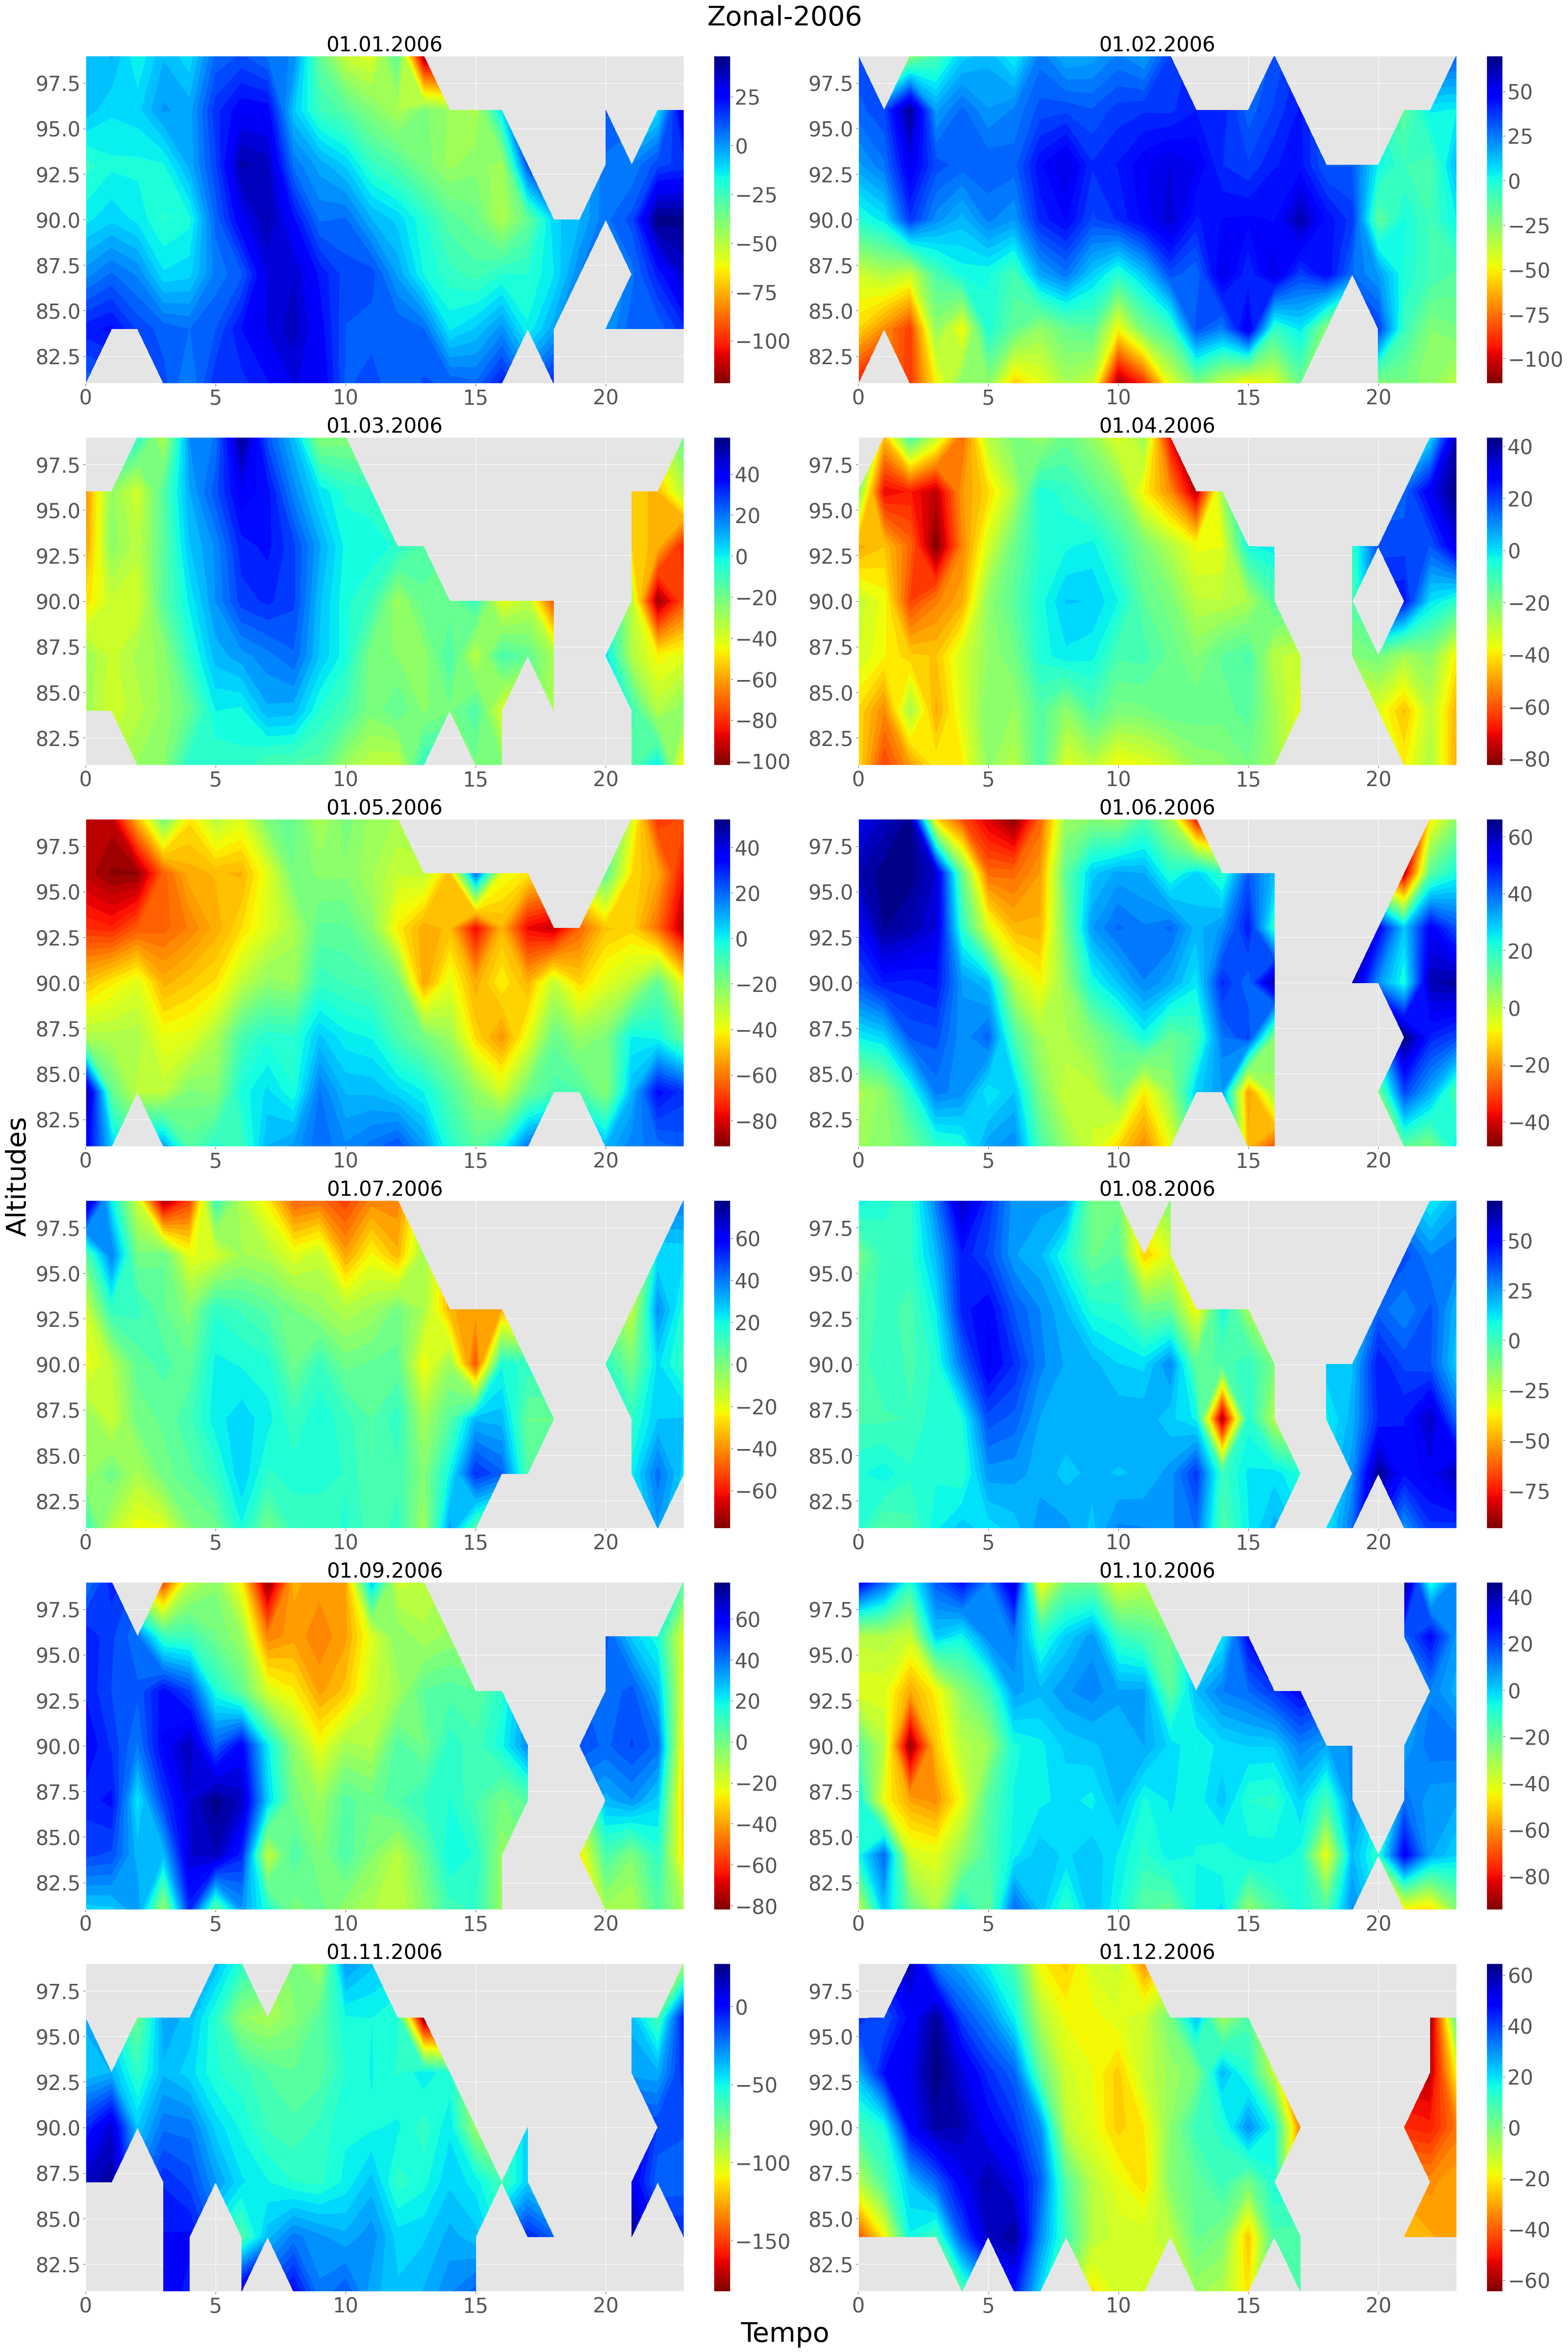

In [15]:
plot_figures("Zonal-2006", dados_zonal_2006, dict_meses, cabe)

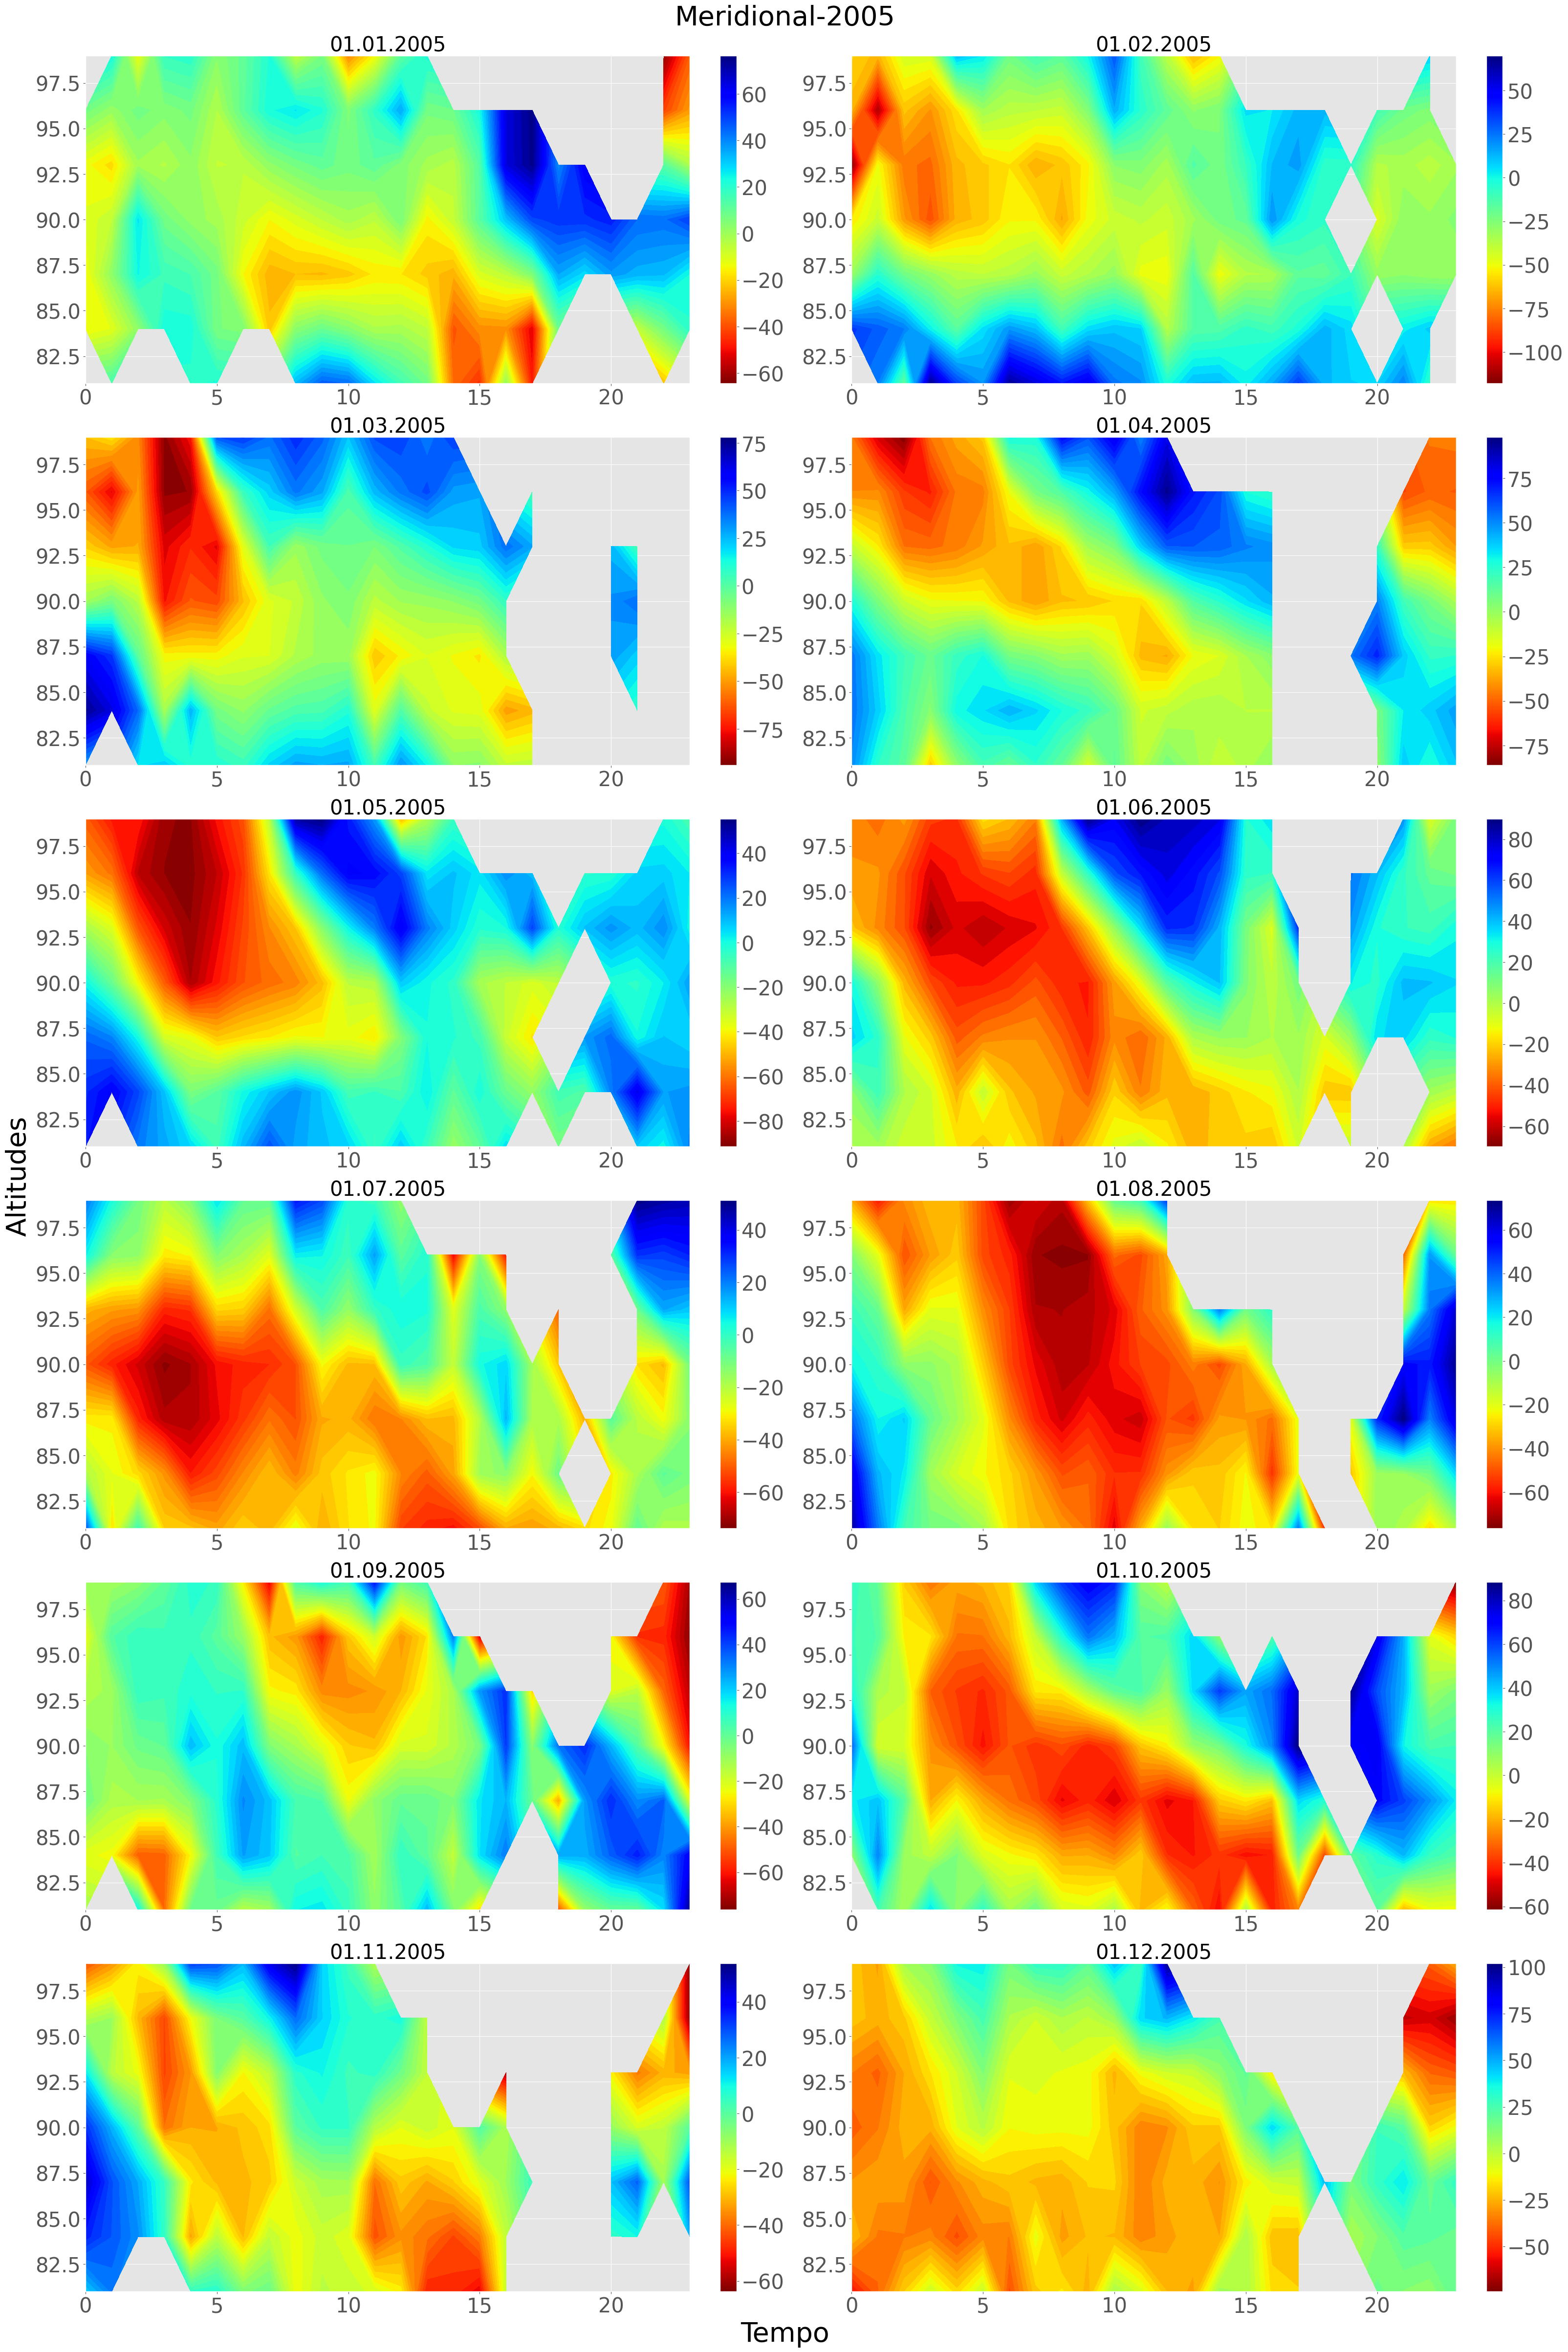

In [16]:
plot_figures("Meridional-2005", dados_meridional_2005, dict_meses, cabe)

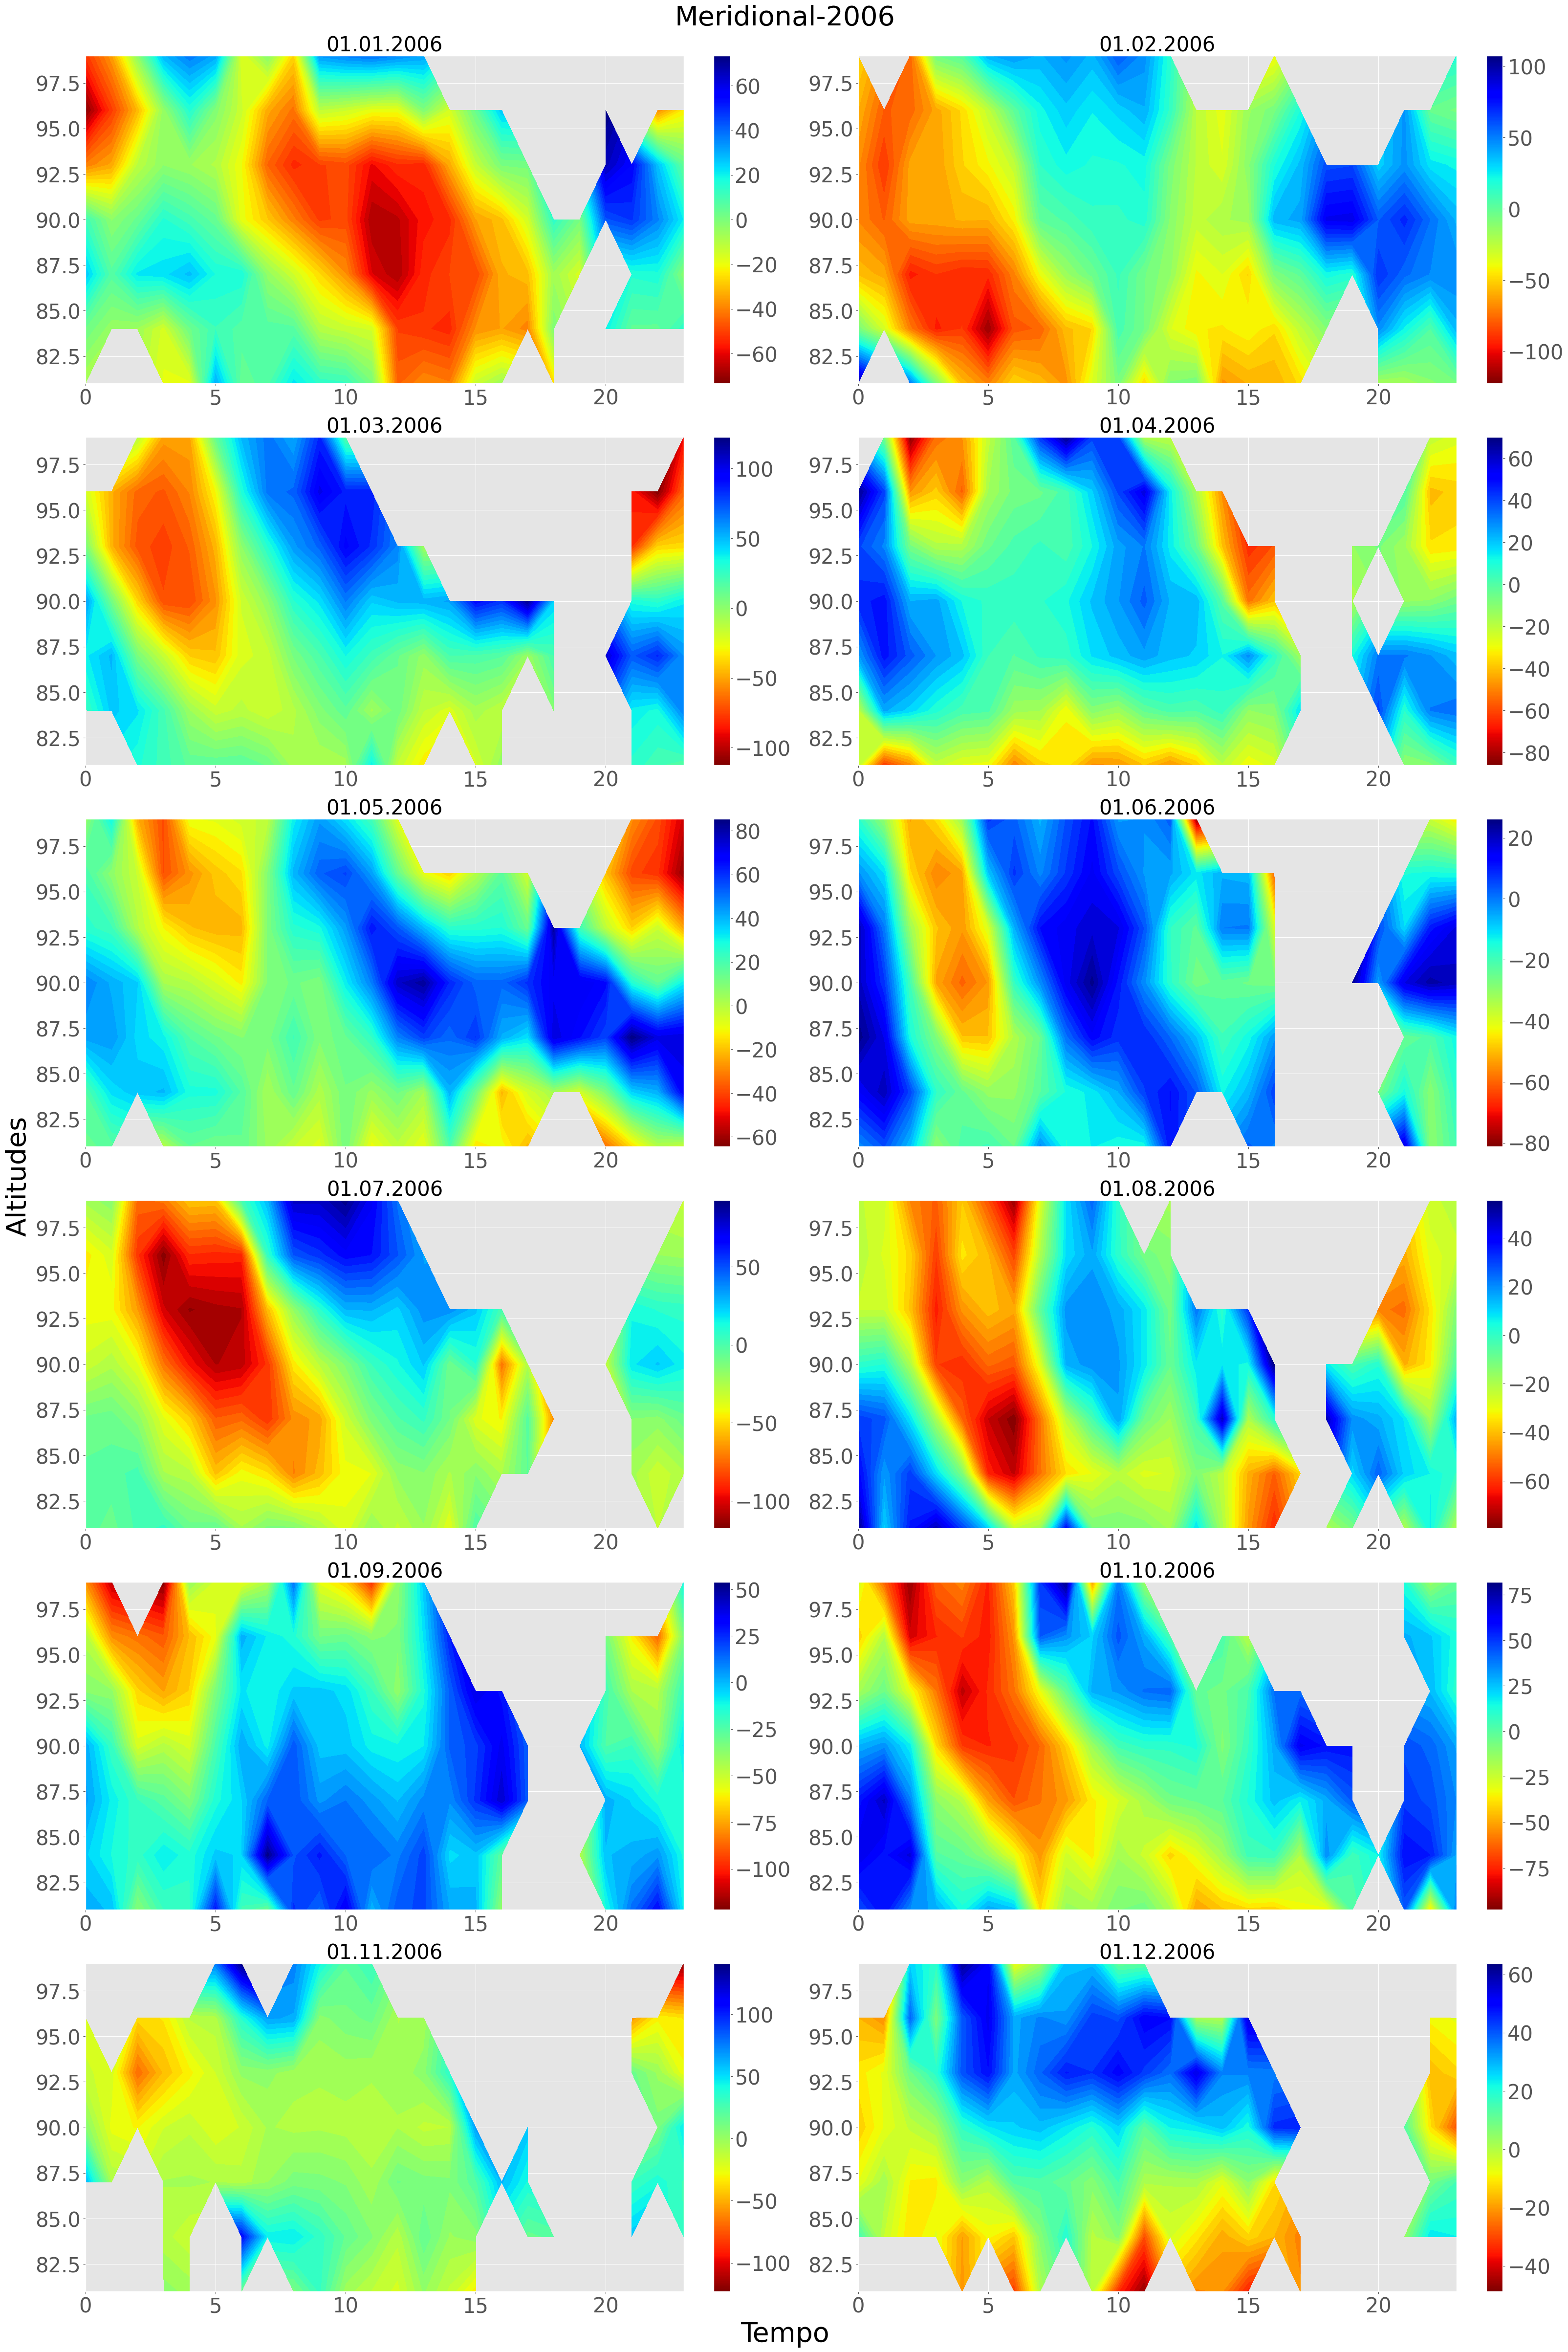

In [17]:
plot_figures("Meridional-2006", dados_meridional_2006, dict_meses, cabe)

In [104]:
##### 